## Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

а) Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy. Полученные значения должны быть равны.

б) Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

### а)

Ковариацией $cov\left(X,\ Y\right)$ случайных величин $X$ и $Y$ называется математическое ожидание произведения случайных величин $X-M\left(X\right)$ и $Y-M\left(Y\right)$:

$$cov\left(X,\ Y\right)=M\left(\left(X-M\left(X\right)\right)\left(Y-M\left(Y\right)\right)\right)$$

### Несмещенная оценка для ковариации

Для двух выборок $X_1,…,X_n$ и $Y_1,…,Y_n$ несмещенная оценка для ковариации случайных величин $X$ и $Y$ имеет вид:

$$\mathit{cov}_{\mathit{XY}} = \frac{\sum{\left(x_i - \overline{X}\right)\left(y_i - \overline{Y}\right)}}{n - 1}$$

Поскольку наш набор данных представляет собой небольшую выборку всего набора данных, мы используем $n - 1$ (нам известны только выборочные средние для обеих переменных)

In [56]:
def covariance(x_list, y_list) -> float:
    assert len(x_list) == len(y_list)
    n = len(x_list) - 1
    mx = sum(x_list) / len(x_list)
    my = sum(y_list) / len(y_list)
    sub_x, sub_y = [_ - mx for _ in x_list], [_ - my for _ in y_list]
    cov = sum([sub_x[_] * sub_y[_] for _ in range(len(sub_x))]) / n
    return cov

In [57]:
# выборки
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

cov = covariance(zp, ks)
print('covariance =', cov)

covariance = 10175.377777777778


In [58]:
import numpy as np

x = np.array(zp)
y = np.array(ks)

# Ковариационная матрица
cov = np.cov(x, y)[0, 1]
print('Коэффициент ковариации =', cov)

# cov_stat_pop = np.mean((x - x.mean()) * (y - y.mean()))
# print('Для генеральной совокупности, коэффициент ковариации =', cov_stat_pop)
# Для генеральной совокупности, коэффициент ковариации = 9157.84


Коэффициент ковариации = 10175.377777777776
для генеральной совокупности, коэффициент ковариации = 9157.84


In [86]:
import statistics as st

cov = st.covariance(zp, ks)
print('Коэффициент ковариации =', cov)

Коэффициент ковариации = 10175.377777777778


### б)
*Коэффициент корреляции Пирсона* — показатель силы и направления
взаимосвязи двух количественных переменных, знак показывает направление взаимосвязи:
$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$

In [60]:
# Стандартные отклонения
n = len(zp)
m_x = sum(([(i - sum(zp) / n) ** 2 for i in zp])) / (n - 1)
m_y = sum(([(i - sum(ks) / n) ** 2 for i in ks])) / (n - 1)
std_x = np.sqrt(m_x)
std_y = np.sqrt(m_y)
r_xy = cov / (std_x * std_y)
print('Коэффициент корреляции =', r_xy)

Коэффициент корреляции = 0.8874900920739162


In [61]:
r_xy = cov / (np.std(zp, ddof=1) * np.std(ks, ddof=1))
print('Коэффициент корреляции =', r_xy)

Коэффициент корреляции = 0.8874900920739162


In [89]:
from scipy import stats

r_xy = stats.pearsonr(zp, ks)[0]
print(f'Коэффициент корреляции = {r_xy}')

Коэффициент корреляции = 0.8874900920739162


In [82]:
import pandas as pd

data = {'zp': zp,
        'ks': ks
        }

df = pd.DataFrame(data)
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [81]:
r_xy = df.corr()
print(f'Коэффициенты корреляции')
r_xy

Коэффициенты корреляции


,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


<AxesSubplot:>

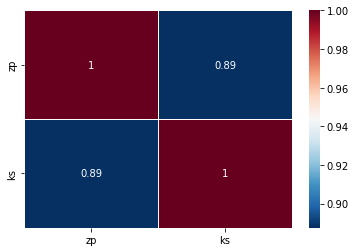

In [84]:
import seaborn as sb

sb.heatmap(r_xy,
           xticklabels=r_xy.columns,
           yticklabels=r_xy.columns,
           cmap='RdBu_r',
           annot=True,
           linewidth=0.5)

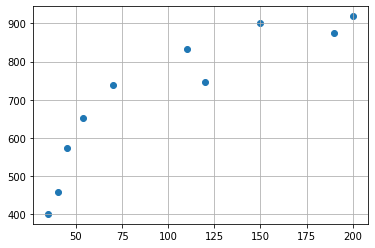

In [125]:
import matplotlib.pyplot as plt

plt.scatter(zp, ks)
plt.grid()

## Задание 2

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111. Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [130]:
data = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111]).astype(float)
p = 0.95
n = data.size
df = n - 1
alpha = 1 - p

mean = np.mean(data)
std = np.std(data, ddof=1)
se = std / n ** 0.5

t_value = stats.t(df).ppf(1 - alpha / 2)

# доверительный интервал
c_i = (mean - t_value * se, mean + t_value * se)
print('[%.2f; %.2f]' % c_i)

[110.56; 125.64]


Ответ: $(110.56; 125.64)$

## Задание 3

Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [134]:
p = 0.95
mean = 174.2
D = 25
n = 27

std = D ** 0.5
se = std / n ** 0.5
alpha = (1 - p) / 2
z = stats.norm().isf(alpha)
c_i = mean - z * se, mean + z * se
print('[%.2f; %.2f]' % c_i)

[172.31; 176.09]


Ответ: $(172.31; 176.09)$